In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fft, fftfreq

path = './EMG_Datasets/EMG_Datasets.csv'
dataset = pd.read_csv(path)
contractedFilterOutput = './Output_Files/contractFilterOut.csv'
relaxedFilterOutput = './Output_Files/relaxedFilterOut.csv'

# y = np.sin(2*np.pi*100*x) # frequency is 100 Hz
relaxedData= dataset['EMG_Relaxed (mV)'].to_numpy()
contractData = dataset['EMG_Contracted (mV)'].to_numpy()
time = dataset['Time (s)'].to_numpy()
x = np.linspace(0,10,len(contractData))

order = 8
fs = 1 / ( time[1] - time[0] )
frequencies_bandpass = [0.1/(fs/2), 450/(fs/2)]
frequencies_stop = [57/(fs/2), 63/(fs/2)]

sos_bandpass = signal.butter(order, frequencies_bandpass, btype='pass', fs = fs, output='sos')
sos_stop = signal.butter(order, frequencies_stop, btype='stop', fs = fs, output='sos')

datasets = [contractData, relaxedData]
filtered_data = []

for data in datasets:
    databpf = signal.sosfilt(sos_bandpass, data)
    databpf_filtered = signal.sosfilt(sos_stop, databpf)
    filtered_data.append(databpf_filtered)

databpfOne, databpfThree = filtered_data

# Get the fft fo both unfiltered and filtered
N = len(contractData)
yf = (2/N) * np.abs(fft(contractData)) 
databpf_f = (2/N) * np.abs(fft(databpfOne))

# Truncate fft to RHS only
xf = fftfreq(N,1/fs) # ts = 1/fs is the 0.1
# yf = yf[0:N//2]
# databpf_f = databpf_f[0:N//2]

yfr = (2/N) * np.abs(fft(relaxedData)) 
databpf_fOne = (2/N) * np.abs(fft(databpfThree))
# yfr = yfr[0:N//2]
# databpf_fOne = databpf_fOne[0:N//2]

# xf = xf[0:N//2]

data_contracted = list(zip(xf, databpf_f))
data_relaxed = list(zip(xf, databpf_fOne))

with open(contractedFilterOutput, "w") as file:
    file.write("Time (s),Filtered EMG Contracted\n")
    for row in data_contracted:
        file.write(f"{row[0]},{row[1]}\n")

with open(relaxedFilterOutput, "w") as file:
    file.write("Time (s),Filtered EMG Relaxed\n")
    for row in data_relaxed:
        file.write(f"{row[0]},{row[1]}\n")

# def check_termination():
#     termination_word = "exit" 
#     user_input = input("Type 'exit' to terminate the program: ")
#     return user_input.lower() == termination_word.lower()

print(len(xf))
print(len(yf))
print(len(databpf_f))
print(len(databpf_fOne))

# plt.pause(0.1) # so that the program doesnt hold/freeze with plt.show(), can continue check_termination

# while True:
#     if check_termination():
#         break

# plt.close()


ValueError: Digital filter critical frequencies must be 0 < Wn < fs/2 (fs=0.2 -> fs/2=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


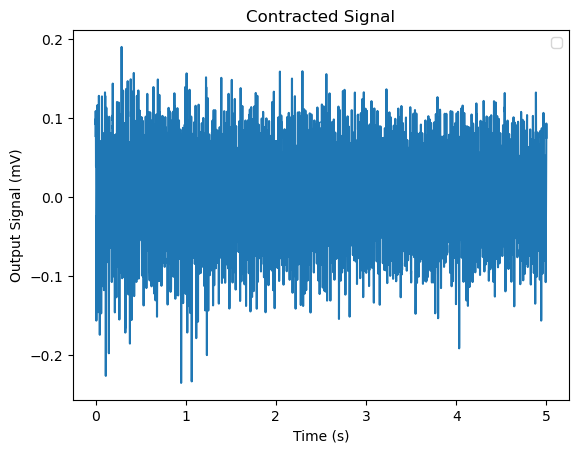

In [117]:
# plt.subplot(1,4,1)
plt.plot(time,contractData)
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Contracted Signal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


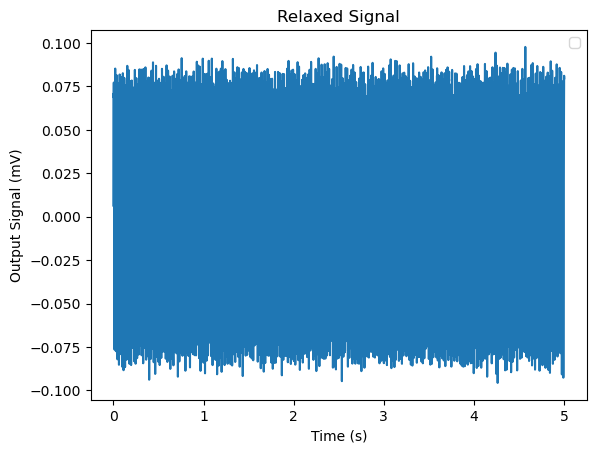

In [104]:
# plt.subplot(1,4,2)
plt.plot(time, relaxedData)
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Relaxed Signal')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


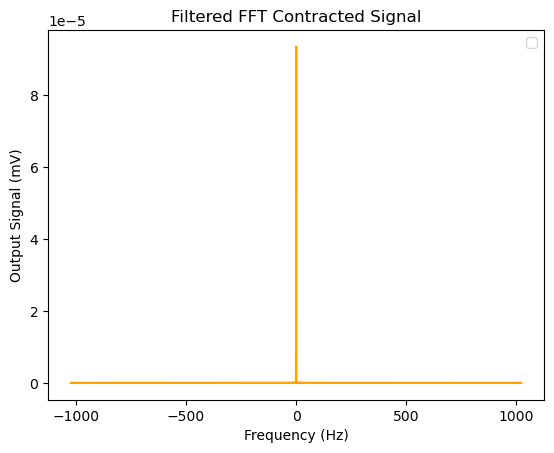

In [141]:
# plt.subplot(1,4,3)
plt.plot(xf,databpf_f, color = 'orange')
# plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Output Signal (mV)')
plt.title('Filtered FFT Contracted Signal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


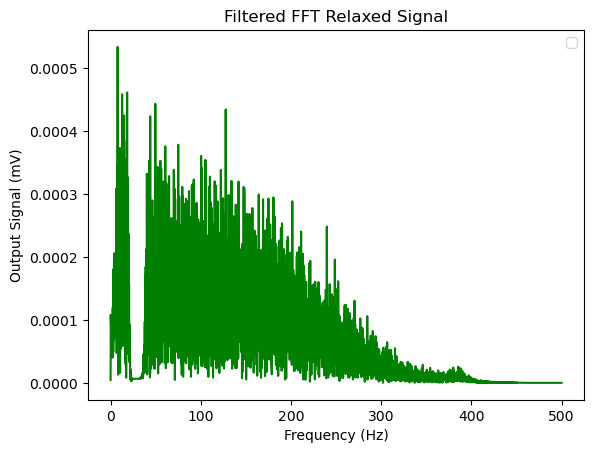

In [129]:
# plt.subplot(1,4,4)
plt.plot(xf,databpf_fOne, color = 'green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Output Signal (mV)')
plt.title('Filtered FFT Relaxed Signal')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


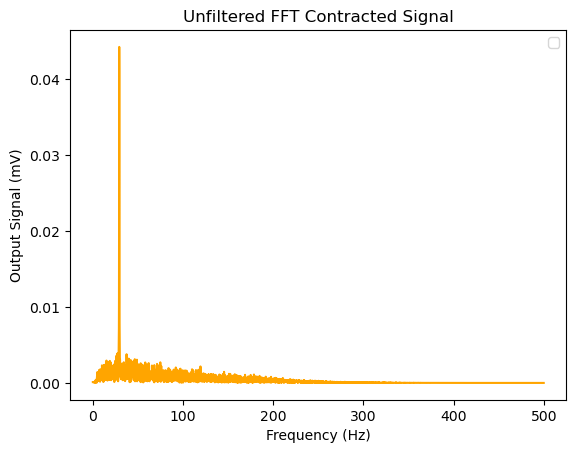

In [110]:
plt.plot(xf ,yf, color = 'orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Output Signal (mV)')
plt.title('Unfiltered FFT Contracted Signal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


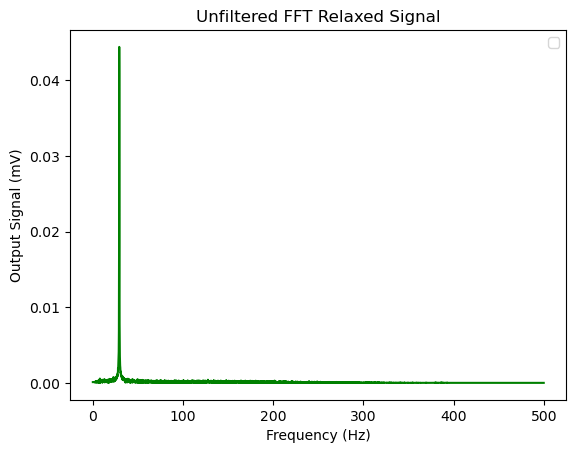

In [122]:
plt.plot(xf ,yfr, color = 'green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Output Signal (mV)')
plt.title('Unfiltered FFT Relaxed Signal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


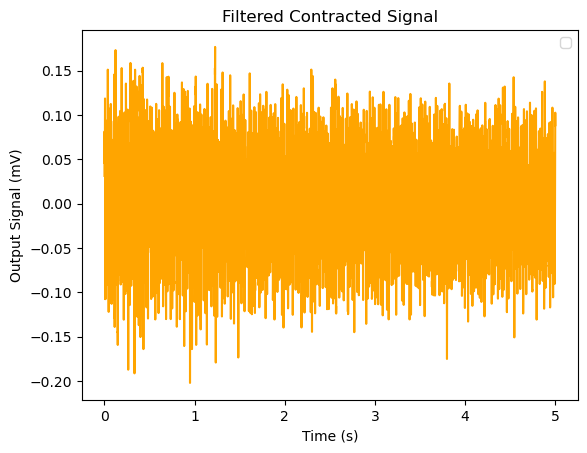

In [107]:
plt.plot(time,databpfOne, color = 'orange')
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Filtered Contracted Signal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


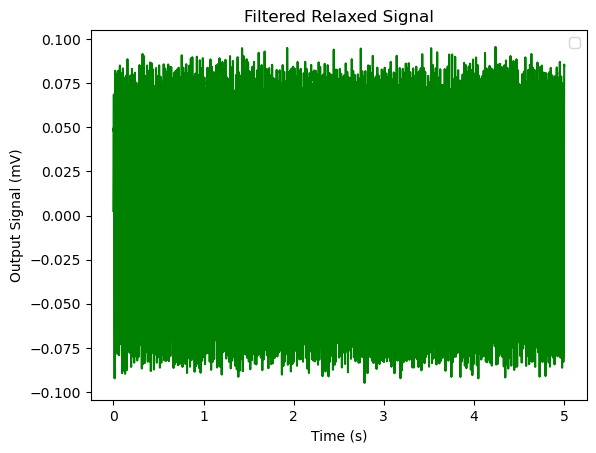

In [108]:
plt.plot(time,databpfThree,color = 'green')
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Filtered Relaxed Signal')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10240
10240
10240
0
RMS of Contracted Signal:  0.0751583884666832
RMS of relaxed Signal:  0.0796910401444701
RMS of filtered Contracted Signal:  0.06409753078859377
RMS of filtered relaxed Signal:  0.056782257414729455


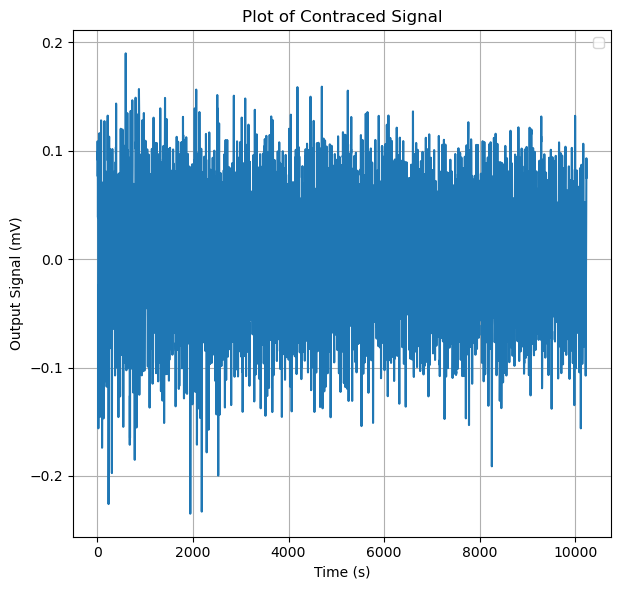

In [119]:
relaxedFilterPath = './Output_Files/relaxedFilterOut.csv'
contractedFilterPath = './Output_Files/contractFilterOut.csv'

dataset = pd.read_csv(path)
filteredContractedDataSet = pd.read_csv(contractedFilterPath)
filteredRelaxedDataSet = pd.read_csv(relaxedFilterPath)

relaxedFilePath = './Output_Files/relaxedRMS.csv'
contractFilePath = './Output_Files/contractRMS.csv'

x = []
xFilter = []
yRelaxed = []
yContract = []
yFilterContract = []

length = len(dataset['Time (s)'])
halfTime = time[0:length//2]

def RMS(emgData):
    return np.sqrt((np.mean((emgData ** 2))))

for _, row in dataset.iterrows():
    time = (row['Time (s)'])
    relaxedEMG = row['EMG_Relaxed (mV)']
    contractEMG = row['EMG_Contracted (mV)']
    relaxedRMS = RMS(relaxedEMG)
    contractedRMS = RMS(contractEMG)

    x.append(time)
    yContract.append(contractedRMS)
    yRelaxed.append(relaxedRMS)

contractFilterRMS = RMS(databpfOne)
relaxedFilterRMS = RMS(databpfThree)

# for _, row in filteredContractedDataSet.iterrows():
#     # timeT = (row['Time (s)'])
#     # timeT = timeT[0:length//2]
#     # contractFilterEMG = row['Filtered EMG Contracted']
#     contractFilterRMS = RMS(yf)

#     # xFilter.append(timeT)
#     yFilterContract.append(contractFilterRMS)

with open(contractFilePath, "w") as file:
    file.write("Time (s),RMS EMG Contracted\n")
    for time, contractedRMS in zip(x, yContract):
        file.write(f"{time},{contractedRMS}\n")

with open(relaxedFilePath, "w") as file:
    file.write("Time (s),RMS EMG Relaxed\n")
    for time, relaxedRMS in zip(x, yRelaxed):
        file.write(f"{time},{relaxedRMS}\n")

def check_termination():
    termination_word = "close" 
    user_input = input("Type 'close' to terminate the program: ")
    return user_input.lower() == termination_word.lower()

print(len(x))
print(len(yRelaxed))
print(len(yContract))
print(len(yFilterContract))


plt.figure(figsize=(18, 6))  # Adjust the figure size as per your requirement


# plotting the relaxed EMG

print("RMS of Contracted Signal: ", contractedRMS)
print("RMS of relaxed Signal: ", relaxedRMS)
print("RMS of filtered Contracted Signal: ", contractFilterRMS)
print("RMS of filtered relaxed Signal: ", relaxedFilterRMS)


# plt.subplot(1,3,1)
# plt.plot(x, yRelaxed, label='Relaxed EMG RMS')
# plt.xlabel('Time (s)')
# plt.ylabel('Relaxed EMG')
# plt.title('Relaxed EMG RMS Processed')

# # plotting the contracted EMG
# plt.subplot(1,3,2)
# plt.plot(x, yContract, label = 'Contracted EMG RMS', color = 'orange')
# plt.xlabel('Time (s)')
# plt.ylabel('Contracted EMG')
# plt.title('Contracted EMG RMS Processed')

first_column = dataset.iloc[:, 0]
third_column = dataset.iloc[:, 2]

# Plot the data
plt.subplot(1,3,3)
# plt.plot(first_column, label='First Column')
plt.plot(third_column)
plt.xlabel('Time (s)')
plt.ylabel('Output Signal (mV)')
plt.title('Plot of Contraced Signal')
plt.legend()
plt.grid(True)

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()
